kmeans algorithm assumes the clusters are circular and are similar in size

In [1]:
from glob import glob
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import glob
import re
import string
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import numpy as np
from heapq import nlargest
import plotly.express as px
from extract_text import extract_cv
from nltk.stem import PorterStemmer
porter=PorterStemmer()
wnl = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# create list of stopwords
stop_words = stopwords.words('english') + ["restricted", "external", "use", "used", "data", "overview", "profile", "professional_experience",
 "skills", "tools_and_utilities", "education", "languages", "data_scientist", "data_science", "university", "using", "&amp", "&", "end", "new", "work", "including", "19", "develop"]


dictionary = {"machine learning": "machine_learning",
    "ml": "machine_learning",
    "power bi": "power_bi",
    "shiny application": "shiny_application",
    "shiny app": "shiny_application",
    "shiny dashboard": "shiny_dashboard",
    "shiny application": "shiny_application",
    "deep learning": "deep_learning",
    "time series": "time_series",
    "professional experience": "professional_experience",
    "natural language processing": "nlp",
    "tools and utilities": "tools_and_utilities",
    "data scientist": "data_scientist",
    "data science": "data_science",
    "statistical": "statistic",
    "covid19": "covid_19",
    "covid-19": "covid_19",
    "covid 19": "covid_19",
    "back end": "back_end",
    " sas ": "sas_programming",
    " sa ": "sas_programming",
    " r ": " r_language ",
    "time-series": "time_series",
    "developed": "develop",
    "development": "develop",
    "monte carlo": "monte_carlo"}


# read in CVs from storage folder
cvs = extract_cv()

# get list of employee names
employee = list(cvs.keys())
employee

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hannah.alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hannah.alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['Andrew Gonzalez Profile.docx',
 'Ben Pope Profile.docx',
 'Claire Franklin Profile.docx',
 'David Johnson Profile.docx',
 'Emily Alderson Profile.docx',
 'Hannah Peters Profile.docx',
 'John Smith Profile.docx',
 'Matthew Green Profile.docx',
 'Sarah Elliot Profile.docx']

In [2]:
#change file poth
import sys
sys.path.insert(1, "../text_cleaning/")
from nlp import replace_all, remove_punctuation,remove_non_ascii, clean_text

In [3]:
# get the CVs as a list from the dictionary
descriptions = [val for key, val in cvs.items()]

for i in range(len(descriptions)):

    # clean text
    words = clean_text(descriptions[i], raw_text = False)
    words = [word.lower() for word in words.split()]

    words = remove_non_ascii(words)
    words = remove_punctuation(words)

    # join, remove and re-split words 
    words = replace_all(" ".join(words), dictionary)

    # remove stopwords
    words = [w for w in words.split() if not w.lower() in stop_words]

    # lemmatize words (i.e. convert playing to play, using to use)
    words = [wnl.lemmatize(word) for word in words]

    words = " ".join(words)

    # add back to list
    descriptions[i] = words

In [4]:
# get count of each word
# similar to above but converting all documents into one large string
words = extract_cv()
words_clean = []

val_ls = [val for key, val in words.items()]

for l in range(len(val_ls)):

    words = clean_text(val_ls[l], raw_text = False)

    words = [w.lower() for w in words.split()]

    words = remove_non_ascii(words)
    words = remove_punctuation(words)

    # join, remove and re-split words 
    words = replace_all(" ".join(words), dictionary)
 
    words = [w for w in words.split() if not w.lower() in stop_words]

    # lemmatize words (i.e. convert playing to play, using to use)
    words = [wnl.lemmatize(word) for word in words]
    
    words = np.unique(words)
    
    words_clean.extend(words)

filtered_sentence = " ".join(words_clean)
filtered_sentence = filtered_sentence.split()
clean_words = {key: filtered_sentence.count(key) for key in filtered_sentence}

In [5]:
# look at the top 20 most common words
l = nlargest(20, clean_words, key = clean_words.get)
new_dict = dict( ((key, clean_words[key]) for key in l) )
df = pd.DataFrame(new_dict.items(), columns=['Word', 'Count'])
df

,Word,Count
0,analysis,9
1,azure,9
2,business,9
3,conducted,9
4,experience,9
5,git,9
6,identify,9
7,jupyter,9
8,python,9
9,r_language,9


In [6]:
# plt 20 most common words
fig = px.bar(df, x = "Word", y = "Count")
fig

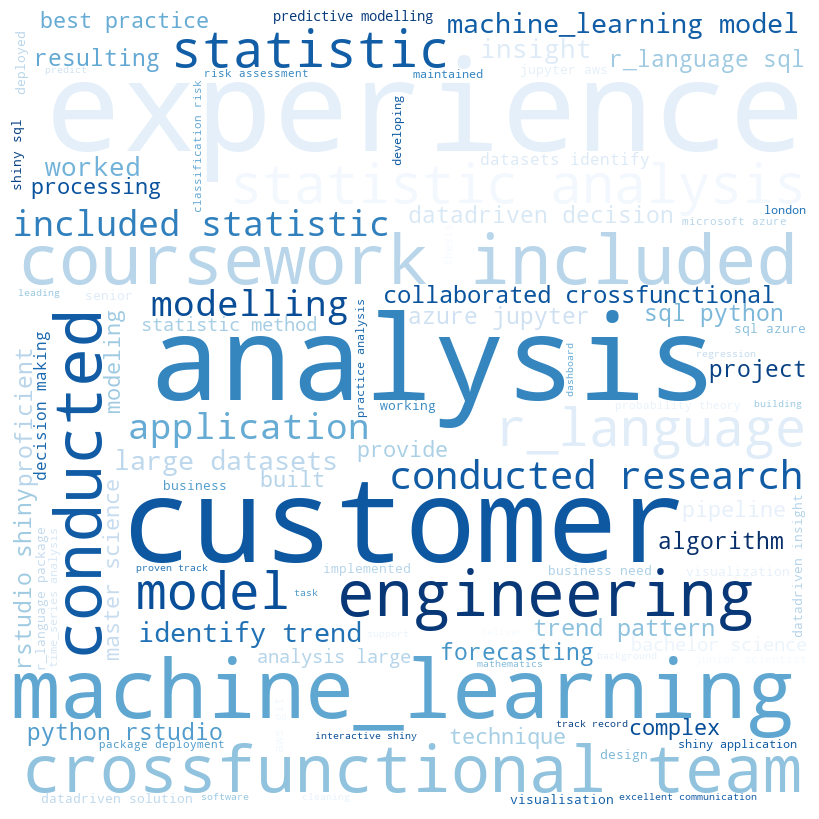

In [7]:
# plot word clusters
wordcloud_words = "".join(descriptions)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, colormap= "Blues").generate(str(wordcloud_words))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Cluster words in documents

In [8]:
# create vectoriser
vectoriser = TfidfVectorizer(
    lowercase = True,
    max_features= 100, #only look at 100 words
    max_df = 0.6, #document frequency threshold - number of documents containing a term
    min_df=0.1, # min percentage of documents word has to occur in corpus
    ngram_range= (1,3), # look at up to trigrams
    stop_words = "english" # remove english stop words (just to make sure)
)

In [9]:
# transform descriptions into vectors
vectors = vectoriser.fit_transform(descriptions)
dense = vectors.todense()

# create set of words that meet TDIF criteria
denselist = dense.tolist()


In [10]:
true_k = 3 #number of clusters we want
model = KMeans(n_clusters= true_k, init = "k-means++", max_iter=100, n_init=1, random_state= 4) # define the model, setting random state to make clusters reproducible
model.fit(vectors) #fit model to clusters

order_centroids = model.cluster_centers_.argsort()[:, ::-1] # get centroids of each cluster
print(vectoriser)
terms = vectoriser.get_feature_names_out() # get words in each cluster




TfidfVectorizer(max_df=0.6, max_features=100, min_df=0.1, ngram_range=(1, 3),
                stop_words='english')


In [11]:
cluster_list = {}

for i in range(true_k): # for each cluster
        dynamic_variable_name = f"Cluster_{i}"
        term_list = []
        for ind in order_centroids[i, :20]: #look at top 20 words
            term_list.append(terms[ind])
        cluster_list[dynamic_variable_name] = term_list

In [12]:
# write findings nicely to a text file
with open ("../output/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :20]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")

In [13]:
employee = list(cvs.keys()) # list employee names
# cleaning names
employee_names = [e.split("-")[0] for e in employee]
employee_names = [x.replace("Profile.docx", "") for x in employee_names]

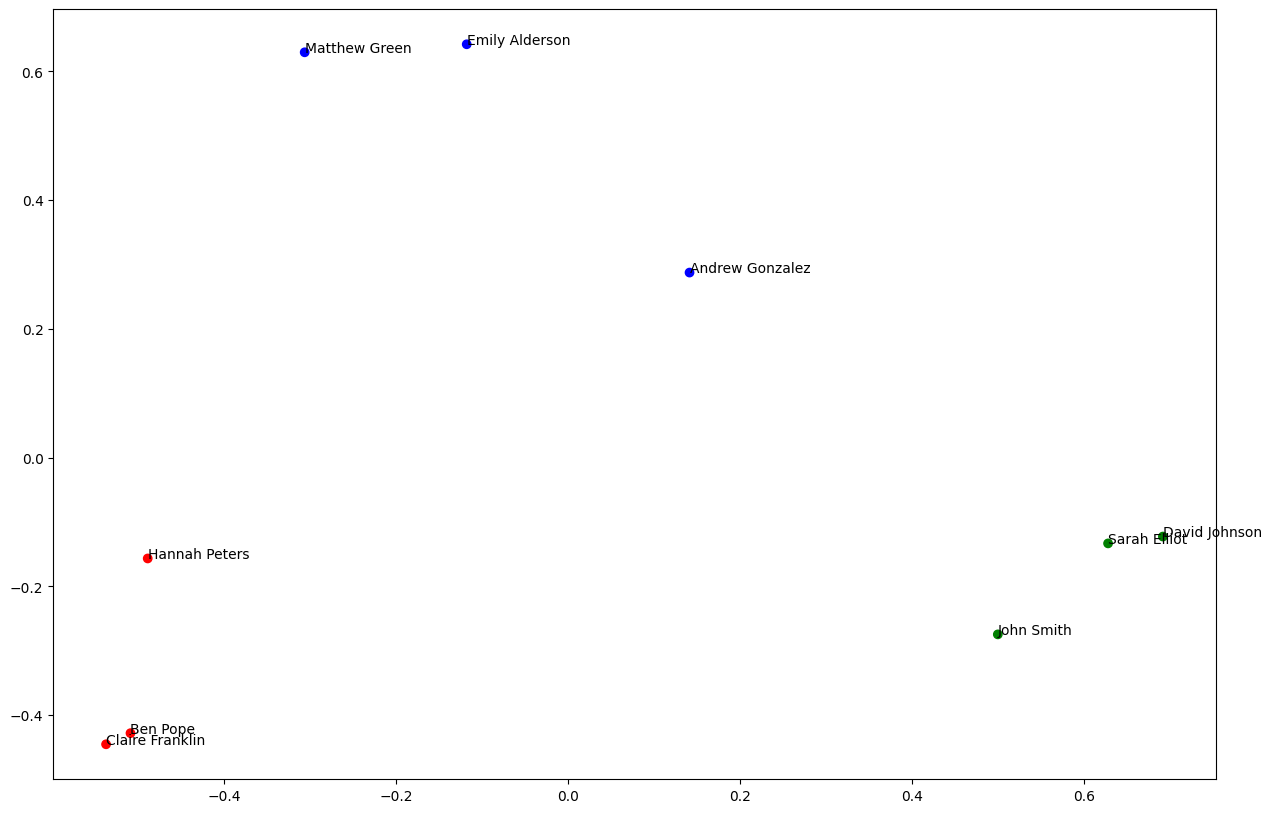

In [14]:
# plot employee clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

terms = vectoriser.get_feature_names_out() # get words in each cluster
kmean_indices = model.fit_predict(vectors) # list of which cluster people are in

# create df of employee and which cluster they're in
cluster_df_indices = pd.DataFrame(list(zip(employee, kmean_indices)), columns=["Employee", "Cluster"])

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray()) # get plotting points
colors = ['b', 'g', 'r']
Cluster = [0, 1, 2]
colour_mapping = pd.DataFrame(list(zip(Cluster, colors)), columns=["Cluster", "Colours"])

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

cluster_df_indices["x_axis"] = x_axis
cluster_df_indices["y_axis"] = y_axis

cluster_df_final = cluster_df_indices.merge(colour_mapping, on = "Cluster")

x_cent = model.cluster_centers_[:, 0]
y_cent = model.cluster_centers_[:, 1]

fig, ax = plt.subplots(figsize = (15, 10))

ax.scatter(cluster_df_final["x_axis"], cluster_df_final["y_axis"], c = cluster_df_final["Colours"])

for i, txt in enumerate(employee_names):
    ax.annotate(txt, (x_axis[i], y_axis[i]))


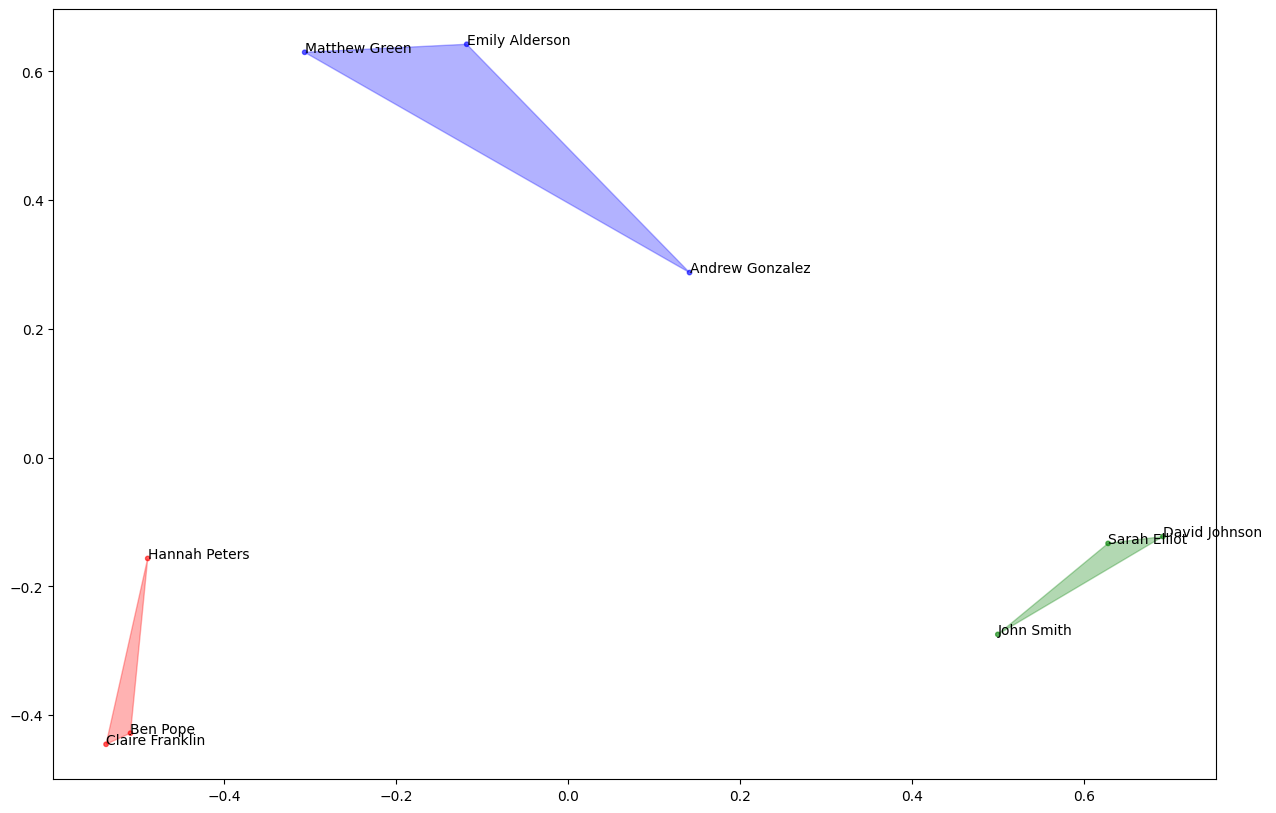

In [15]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(15,10))
df = {}

df = pd.DataFrame(list(zip(y_axis, x_axis)), columns = ["y_vals", "x_vals"])

df['cluster'] = list(kmean_indices)

colors = ['b', 'g', 'r']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# get centroids
labels = kmean_indices
centroids = model.cluster_centers_
centroid_labels = [centroids[i] for i in labels]

centers = np.array(model.cluster_centers_)

cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

# add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})


# plot data
plt.scatter(x_axis, y_axis, c = [colors[d] for d in kmean_indices], alpha = 0.6, s=10)

# draw enclosure
for i in np.unique(kmean_indices):
    points = df[df.cluster == i][['x_vals', 'y_vals']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])

    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

for i, txt in enumerate(employee_names):
    ax.annotate(txt, (x_axis[i], y_axis[i]))


In [16]:
cluster_characterisitics = list(cluster_list.values())
cluster_names = list(cluster_list.keys())
pd.DataFrame(list(zip(cluster_characterisitics, cluster_names, colors)), columns= ["cluster_characterisitics", "cluster_names", "colors"])

,cluster_characterisitics,cluster_names,colors
0,"[microsoft, microsoft azure, forecasting, clou...",Cluster_0,b
1,"[visualisation, deployment, predictive, packag...",Cluster_1,g
2,"[engineering, risk, decision, software, tool, ...",Cluster_2,r


## Most frequent words in each cluster

Text(0.5, 1.0, 'Cluster 2')

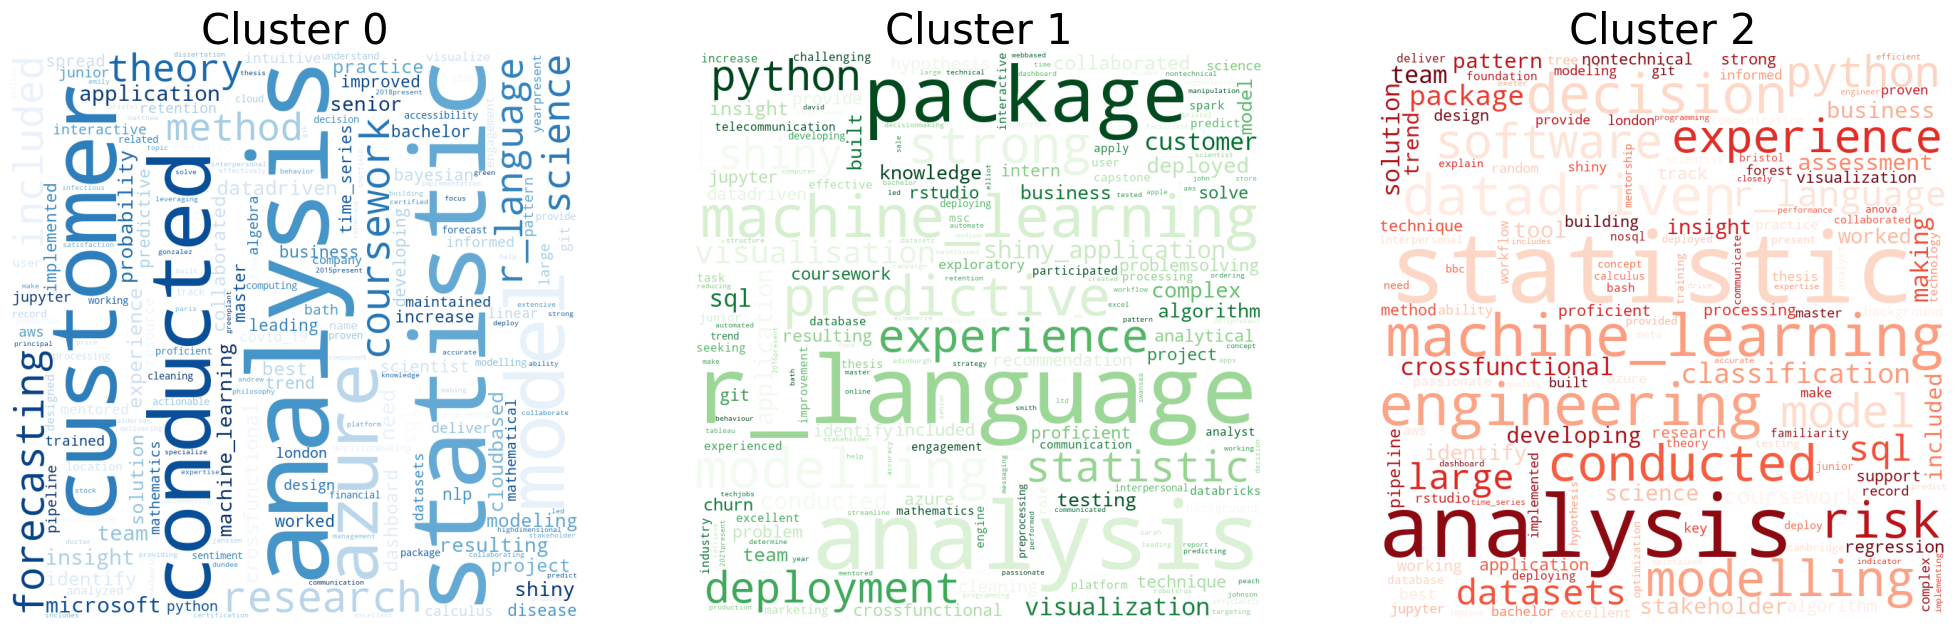

In [17]:
df = pd.DataFrame({'words':descriptions, 'cluster':kmean_indices})
df_filtered_0 = df[df.cluster==0].words
cluster_skills_text_0 = " ".join(df_filtered_0.tolist())

df_filtered_1 = df[df.cluster==1].words
cluster_skills_text_1 = " ".join(df_filtered_1.tolist())

df_filtered_2 = df[df.cluster==2].words
cluster_skills_text_2 = " ".join(df_filtered_2.tolist())


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 50))

ax1.plot()
wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, collocations=False, colormap= "Blues").generate(str(cluster_skills_text_0))
ax1.imshow(wordcloud)
ax1.axis("off")
ax1.set_title("Cluster 0", fontsize=30)

ax2.plot()
wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, collocations=False, colormap= "Greens").generate(str(cluster_skills_text_1))
ax2.imshow(wordcloud)
ax2.axis("off")
ax2.set_title("Cluster 1", fontsize=30)

ax3.plot()
wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, collocations=False, colormap= "Reds").generate(str(cluster_skills_text_2))
ax3.imshow(wordcloud)
ax3.axis("off")
ax3.set_title("Cluster 2", fontsize=30)

## Words which contribute most heavily to each cluster

In [18]:
import itertools

# create df showing how "close" each word is to each center
word_importance_df = pd.DataFrame(list(zip(terms, model.cluster_centers_[0], model.cluster_centers_[1], model.cluster_centers_[2])), columns = ["Words", "Cluster 0", "Cluster 1", "Cluster 2"])

word_importance_df


,Words,Cluster 0,Cluster 1,Cluster 2
0,algorithm,0.000000,0.124597,0.086009
1,analysis conducted,0.096562,0.000000,0.019232
2,analysis conducted research,0.096562,0.000000,0.019232
3,analysis forecasting,0.096562,0.000000,0.019232
4,analysis large,0.059878,0.000000,0.089438
...,...,...,...,...
95,tool,0.000000,0.000000,0.158156
96,track,0.043998,0.000000,0.089438
97,visualisation,0.000000,0.323927,0.000000
98,visualization,0.019542,0.176639,0.072277


In [19]:
word_importance_dict = {}

for cluster in ["Cluster 0", "Cluster 1", "Cluster 2"]:
    
    word_importance = []

    c = -1
    for w in word_importance_df["Words"]:
        c = c +1
        importance = word_importance_df[cluster][c]
        val = round(importance*100)
        word_importance.append([(w + " ")*val])

    cluster_word_importance = " ".join(list(itertools.chain.from_iterable(word_importance)))
    cluster_word = cluster_word_importance.split()
    word_importance_dict[cluster] = cluster_word


Text(0.5, 1.0, 'Cluster 2')

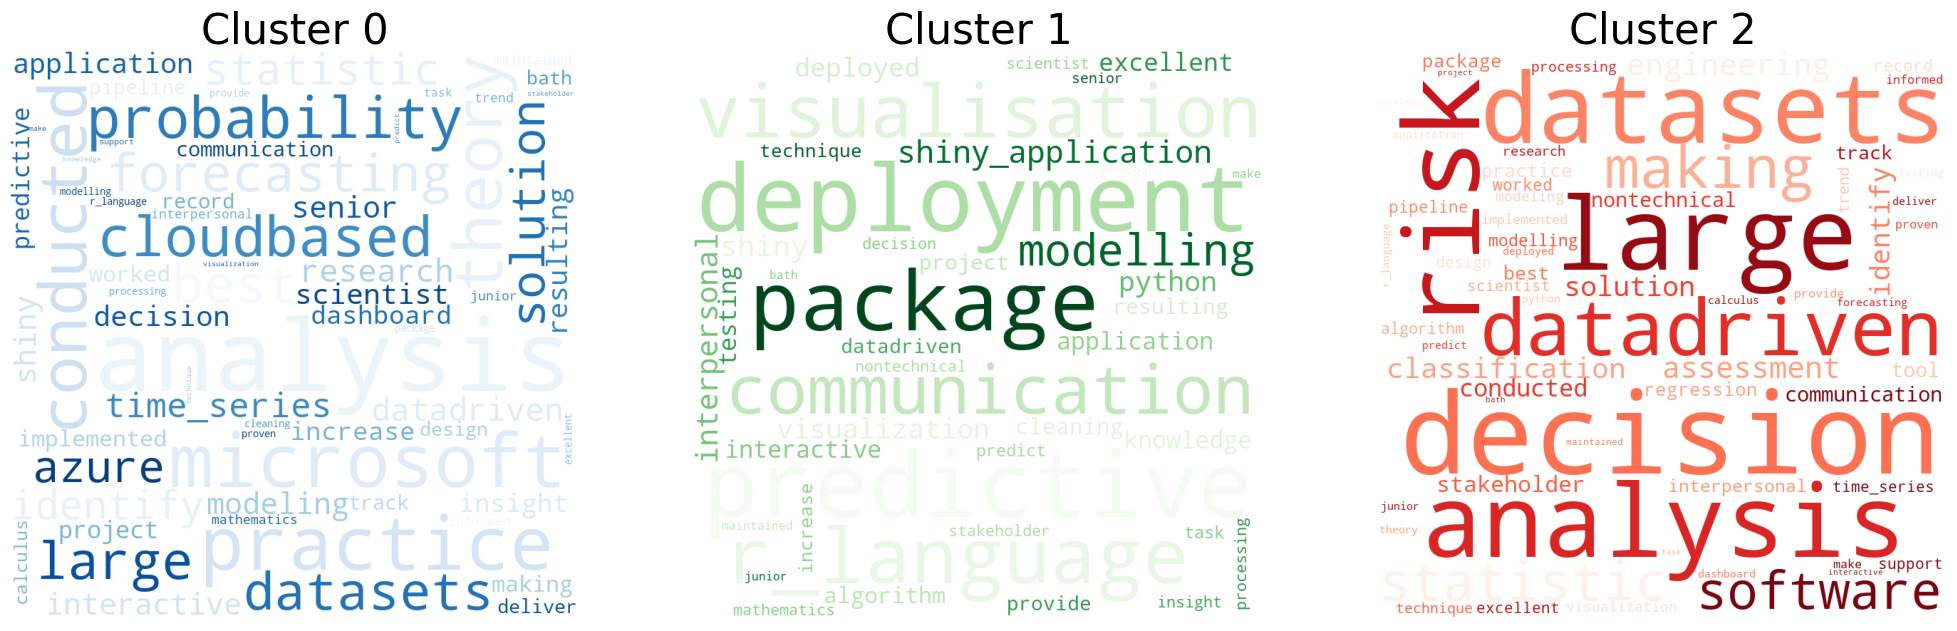

In [20]:
index = 0
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 50))

cluster_word_0 = " ".join(word_importance_dict["Cluster 0"])
cluster_word_1 = " ".join(word_importance_dict["Cluster 1"])
cluster_word_2 = " ".join(word_importance_dict["Cluster 2"])

ax1.plot()
wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, collocations=False, colormap= "Blues").generate(str(cluster_word_0))
ax1.imshow(wordcloud)
ax1.axis("off")
ax1.set_title("Cluster 0", fontsize=30)

ax2.plot()
wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, collocations=False, colormap= "Greens").generate(str(cluster_word_1))
ax2.imshow(wordcloud)
ax2.axis("off")
ax2.set_title("Cluster 1", fontsize=30)

ax3.plot()
wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, collocations=False, colormap= "Reds").generate(str(cluster_word_2))
ax3.imshow(wordcloud)
ax3.axis("off")
ax3.set_title("Cluster 2", fontsize=30)
